In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

448

In [5]:
spending_practical_df = pd.read_table('data/medication_to_class_indiction.tsv')
spending_practical_df.head()

,doctor_id,specialty,medication,nb_beneficiaries,spending,log_spending,medication_name,opioid,antibiotic,high_risk,antipsychotic,indication_flag,log_nb_beneficiaries
0,1255626040,FAMILY PRACTICE,METFORMIN HCL,30,135.24,4.907051,METFORMIN HCL,0,0,0,0,not_ctr_indic,3.401197
1,1912118928,FAMILY PRACTICE,METFORMIN HCL,20,1066.90,6.972513,METFORMIN HCL,0,0,0,0,not_ctr_indic,2.995732
2,1023116894,FAMILY PRACTICE,METFORMIN HCL,161,726.60,6.588376,METFORMIN HCL,0,0,0,0,not_ctr_indic,5.081404
3,1871916031,FAMILY PRACTICE,METFORMIN HCL,59,235.41,5.461329,METFORMIN HCL,0,0,0,0,not_ctr_indic,4.077537
4,1467565440,FAMILY PRACTICE,METFORMIN HCL,22,3373.47,8.123697,METFORMIN HCL,0,0,0,0,not_ctr_indic,3.091042


In [13]:
spending_practical_df.groupby("specialty")["nb_beneficiaries"].sum().sort_values(ascending=False)[0:5]

specialty
INTERNAL MEDICINE      185601
FAMILY PRACTICE        119673
CARDIOLOGY              29753
NURSE PRACTITIONER      29233
PHYSICIAN ASSISTANT     19805
Name: nb_beneficiaries, dtype: int64

In [78]:
top_5 = spending_practical_df.groupby("specialty")["nb_beneficiaries"].sum().sort_values(ascending=False)[0:5].index

In [79]:
top_5

Index(['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'CARDIOLOGY',
       'NURSE PRACTITIONER', 'PHYSICIAN ASSISTANT'],
      dtype='object', name='specialty')

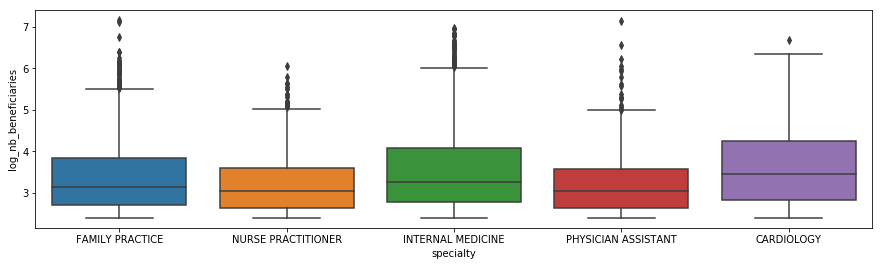

In [84]:
plt.figure(figsize=(15,4))
top_5_data = spending_practical_df[spending_practical_df["specialty"].isin(top_5)]
sns.boxplot(x= "specialty", y="log_nb_beneficiaries",  data=top_5_data)

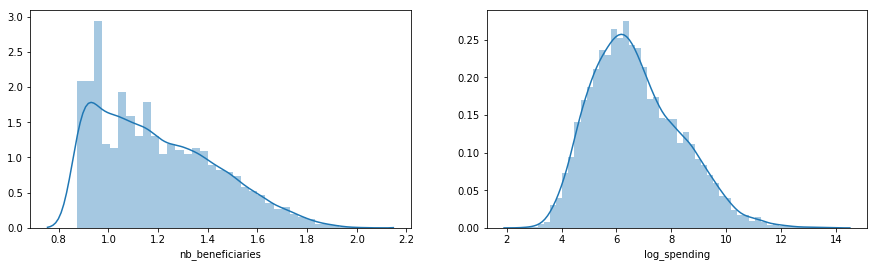

In [166]:
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.distplot(pd.np.log(pd.np.log(spending_practical_df["nb_beneficiaries"])))
plt.subplot(122)
sns.distplot(spending_practical_df["log_spending"])

#

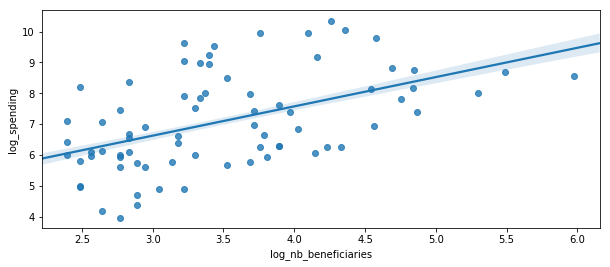

In [55]:
plt.figure(figsize=(10,4))
spending_cardiology= spending_practical_df[spending_practical_df["specialty"] == "GERIATRIC MEDICINE"]
sns.regplot(x="log_nb_beneficiaries", y="log_spending", data=spending_cardiology, ci=55);

In [92]:
top_10_medications_spending = spending_practical_df.groupby("medication")["spending"].sum().sort_values(ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

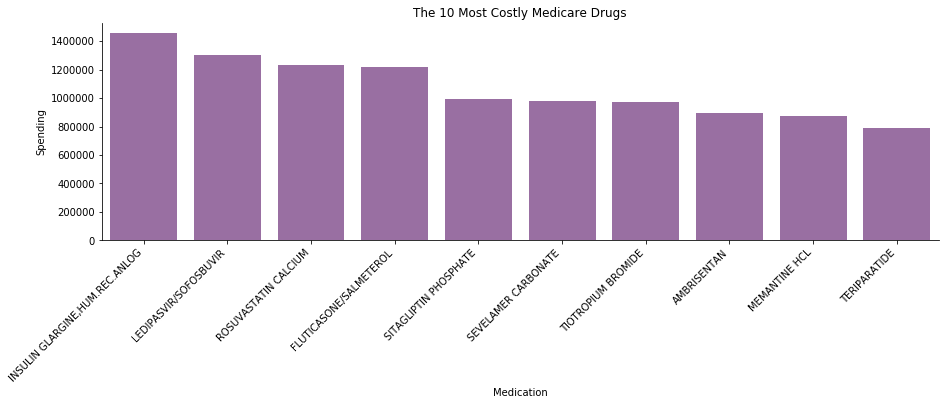

In [133]:
plt.figure(figsize=(15,4))
data=top_10_medications_spending.head(10)
sns.barplot(data.index, y=data, color="#9e66ab", )
plt.xlabel("Medication")
plt.ylabel("Spending")
plt.title("The 10 Most Costly Medicare Drugs")
sns.despine()
plt.xticks(rotation=45, ha="right", )